<a href="https://colab.research.google.com/github/anuvarghese4/ORES/blob/main/R_visualisation_dsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [58]:
dataset = read.csv('refined_data.csv')

In [59]:
head(dataset)

,X,State,Uninsured.Rate..2010.,Uninsured.Rate..2015.,Uninsured.Rate.Change..2010.2015.,Health.Insurance.Coverage.Change..2010.2015.,Employer.Health.Insurance.Coverage..2015.,Marketplace.Health.Insurance.Coverage..2016.,Marketplace.Tax.Credits..2016.,Average.Monthly.Tax.Credit..2016.,State.Medicaid.Expansion..2016.,Medicaid.Enrollment..2013.,Medicaid.Enrollment..2016.,Medicaid.Enrollment.Change..2013.2016.,Medicare.Enrollment..2016.,Coverage.Change.Rate
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0,Alabama,0.146,0.101,-0.045,215000,2545000,165534,152206,310,0,799176,910775,111599,989855,-4777778
2,1,Alaska,0.199,0.149,-0.050,36000,390000,17995,16205,750,1,122334,166625,44291,88966,-720000
3,2,Arizona,0.169,0.108,-0.061,410000,3288000,179445,124346,230,1,1201770,1716198,514428,1175624,-6721311
4,3,Arkansas,0.175,0.095,-0.080,234000,1365000,63357,56843,306,1,556851,920194,363343,606146,-2925000
5,4,California,0.185,0.086,-0.099,3826000,9254000,1415428,1239893,309,1,7755381,11843081,4087700,5829777,-38646465
6,5,Colorado,0.159,0.081,-0.078,419000,2949000,108311,67062,318,1,783420,1375264,591844,820234,-5371795


`geom_smooth()` using formula = 'y ~ x'


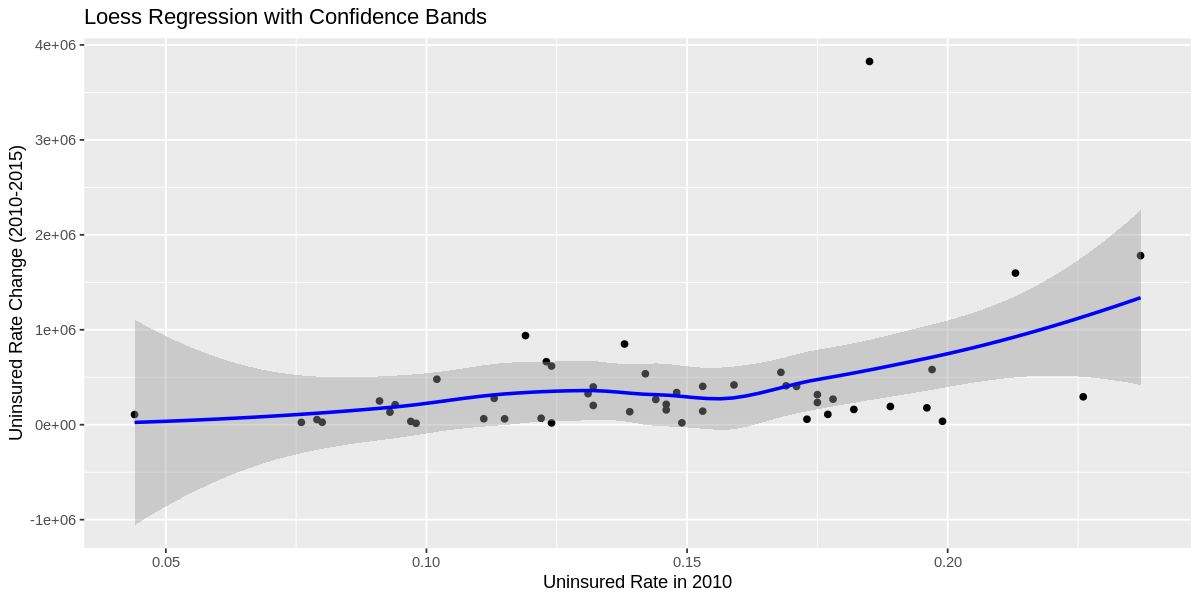

In [60]:
# Load necessary libraries
library(ggplot2)


# Plotting the data with a Loess regression line and shaded confidence bands
ggplot(dataset, aes(x =Uninsured.Rate..2010., y = Health.Insurance.Coverage.Change..2010.2015.)) +
  geom_point() +
  geom_smooth(method = "loess", se = TRUE, color = "blue") +
  labs(title = "Loess Regression with Confidence Bands",
       x = "Uninsured Rate in 2010",
       y = "Uninsured Rate Change (2010-2015)")




`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


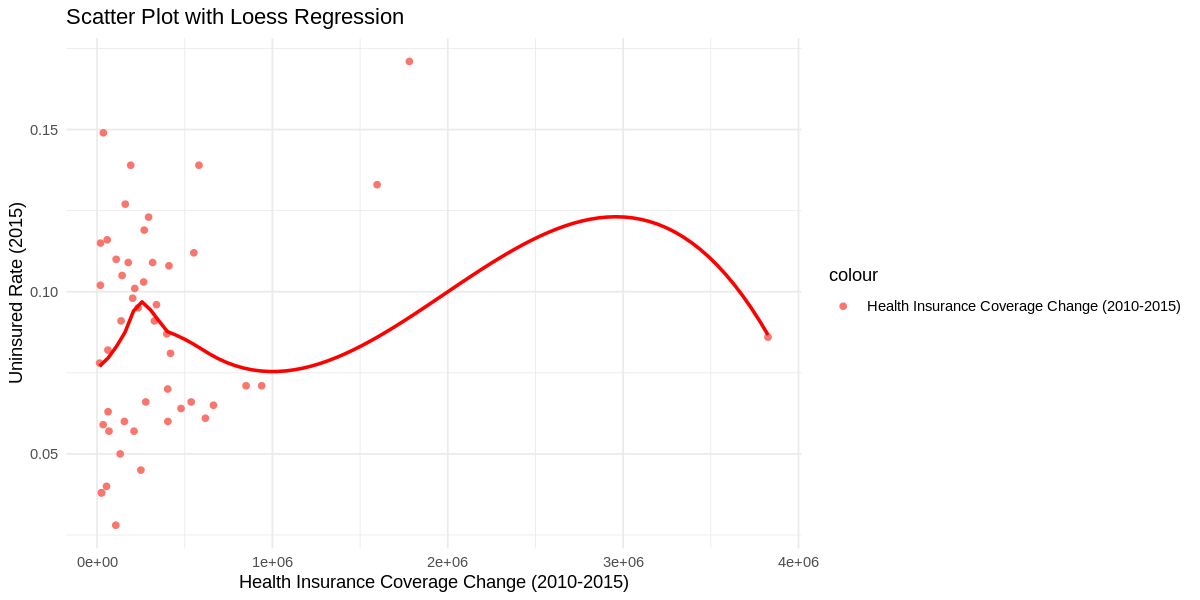

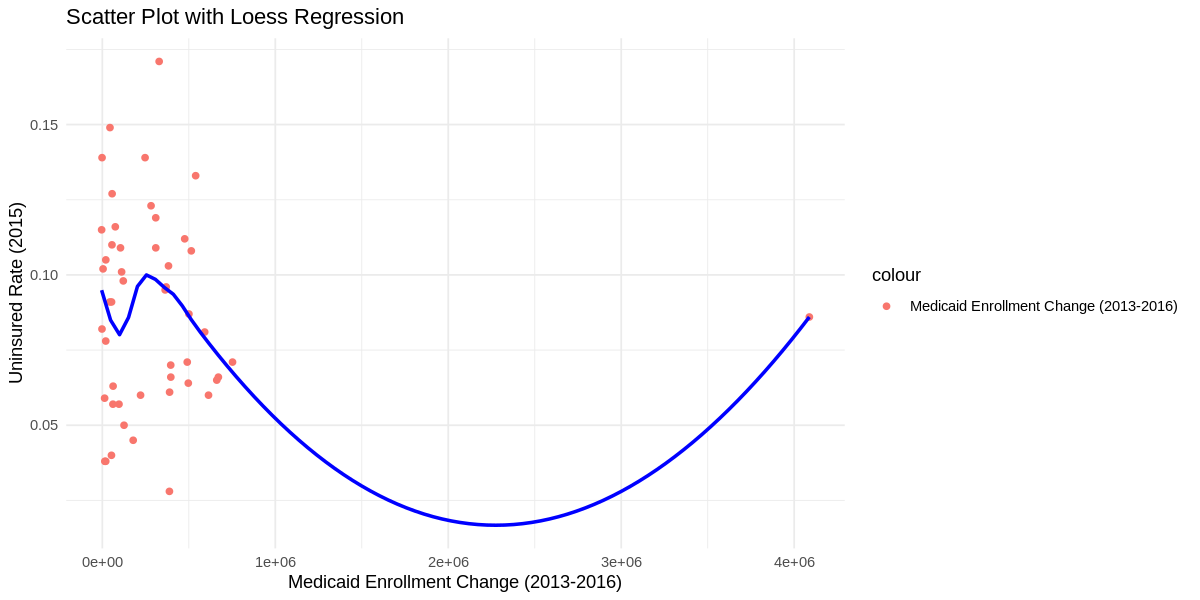

In [61]:
# the figure size
options(repr.plot.width = 10, repr.plot.height = 5)

# scatter plot with Loess regression line for Health Insurance Coverage Change (2010-2015)
ggplot(dataset, aes(x = Health.Insurance.Coverage.Change..2010.2015., y = Uninsured.Rate..2015.)) +
  geom_point(aes(color = "Health Insurance Coverage Change (2010-2015)")) +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(title = "Scatter Plot with Loess Regression",
       x = "Health Insurance Coverage Change (2010-2015)",
       y = "Uninsured Rate (2015)") +
  theme_minimal()

# scatter plot with Loess regression line for Medicaid Enrollment Change (2013-2016)
ggplot(dataset, aes(x = Medicaid.Enrollment.Change..2013.2016., y = Uninsured.Rate..2015.)) +
  geom_point(aes(color = "Medicaid Enrollment Change (2013-2016)")) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot with Loess Regression",
       x = "Medicaid Enrollment Change (2013-2016)",
       y = "Uninsured Rate (2015)") +
  theme_minimal()


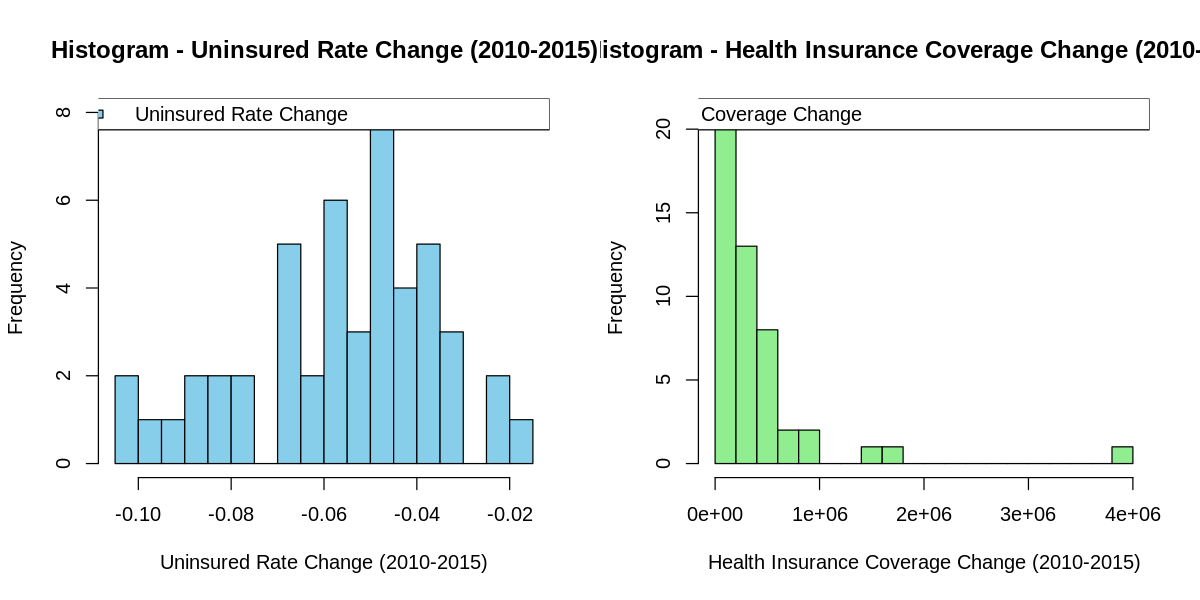

In [62]:
# Assuming 'dataset' is your data frame

# Selecting two variables of interest
uninsured_rate_change <- dataset$`Uninsured.Rate.Change..2010.2015.`
health_coverage_change <- dataset$`Health.Insurance.Coverage.Change..2010.2015.`

# Set up the layout for the plots
par(mfrow = c(1, 2))

# Histogram for Uninsured Rate Change (2010-2015) with legend
hist(uninsured_rate_change, breaks = 20, col = "skyblue", border = "black",
     main = "Histogram - Uninsured Rate Change (2010-2015)",
     xlab = "Uninsured Rate Change (2010-2015)",
     ylab = "Frequency")
legend("topright", legend = "Uninsured Rate Change", fill = "skyblue")

# Histogram for Health Insurance Coverage Change (2010-2015) with legend
hist(health_coverage_change, breaks = 20, col = "lightgreen", border = "black",
     main = "Histogram - Health Insurance Coverage Change (2010-2015)",
     xlab = "Health Insurance Coverage Change (2010-2015)",
     ylab = "Frequency")
legend("topright", legend = "Health Insurance Coverage Change", fill = "lightgreen")


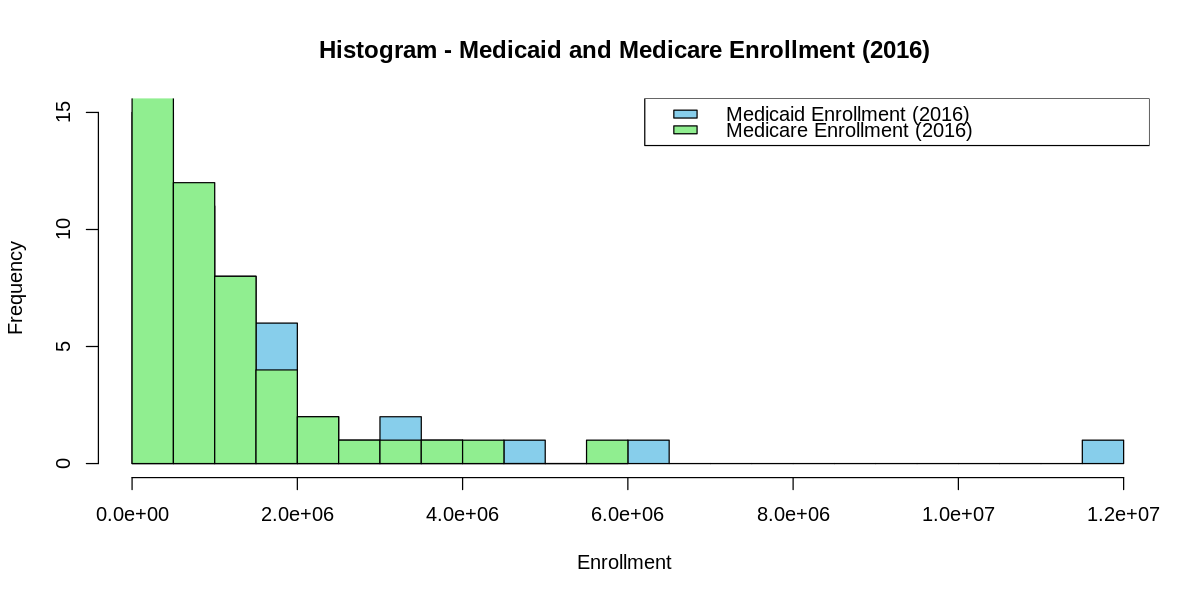

In [63]:
# two variables of interest
medicaid_enrollment_2016 <- dataset$`Medicaid.Enrollment..2016.`
medicare_enrollment_2016 <- dataset$`Medicare.Enrollment..2016.`

# Create a histogram with legends
hist(medicaid_enrollment_2016, breaks = 20, col = "skyblue", border = "black",
     main = "Histogram - Medicaid and Medicare Enrollment (2016)",
     xlab = "Enrollment",
     ylab = "Frequency",
     xlim = c(min(c(medicaid_enrollment_2016, medicare_enrollment_2016)),
              max(c(medicaid_enrollment_2016, medicare_enrollment_2016))))

# Add the second histogram to the existing plot
hist(medicare_enrollment_2016, breaks = 20, col = "lightgreen", border = "black", add = TRUE)

# Add legend
legend("topright", legend = c("Medicaid Enrollment (2016)", "Medicare Enrollment (2016)"),
       fill = c("skyblue", "lightgreen"))


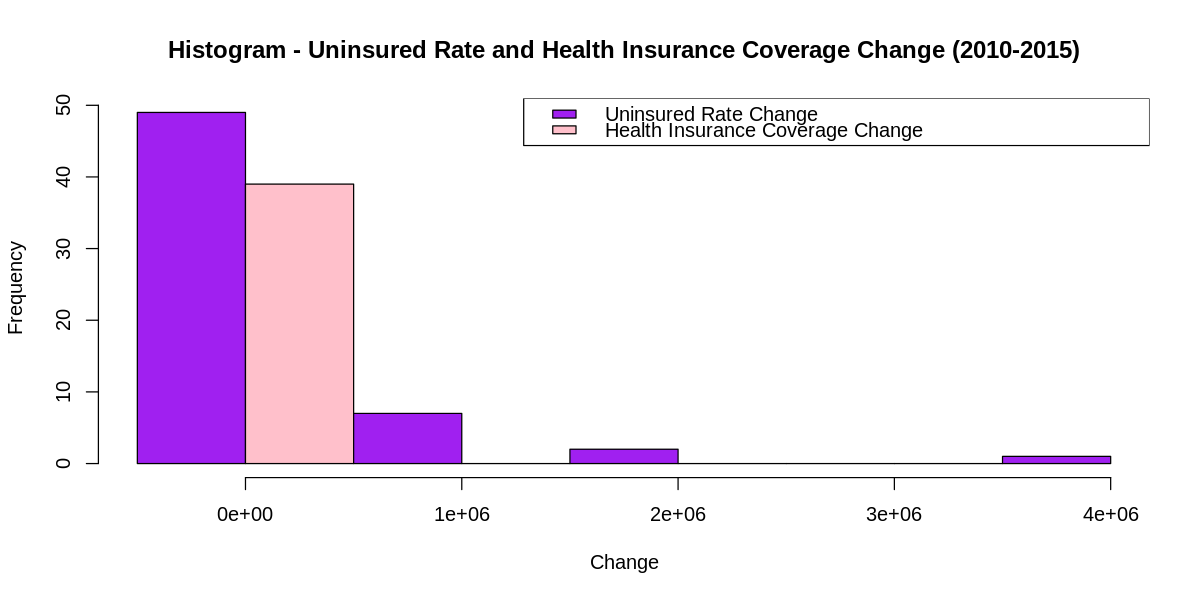

In [64]:
# two variables of interest
uninsured_rate_change <- dataset$`Uninsured.Rate.Change..2010.2015.`
health_coverage_change <- dataset$`Health.Insurance.Coverage.Change..2010.2015.`

# Combine the data into a matrix
hist_data <- matrix(c(uninsured_rate_change, health_coverage_change), ncol = 2)

# Set up the layout for the plot
par(mfrow = c(1, 1))

# Create a histogram with different colors for each variable
hist(hist_data, col = c("purple", "pink"), border = "black",
     main = "Histogram - Uninsured Rate and Health Insurance Coverage Change (2010-2015)",
     xlab = "Change",
     ylab = "Frequency")

# Add a legend
legend("topright", legend = c("Uninsured Rate Change", "Health Insurance Coverage Change"),
       fill = c("purple", "pink"))


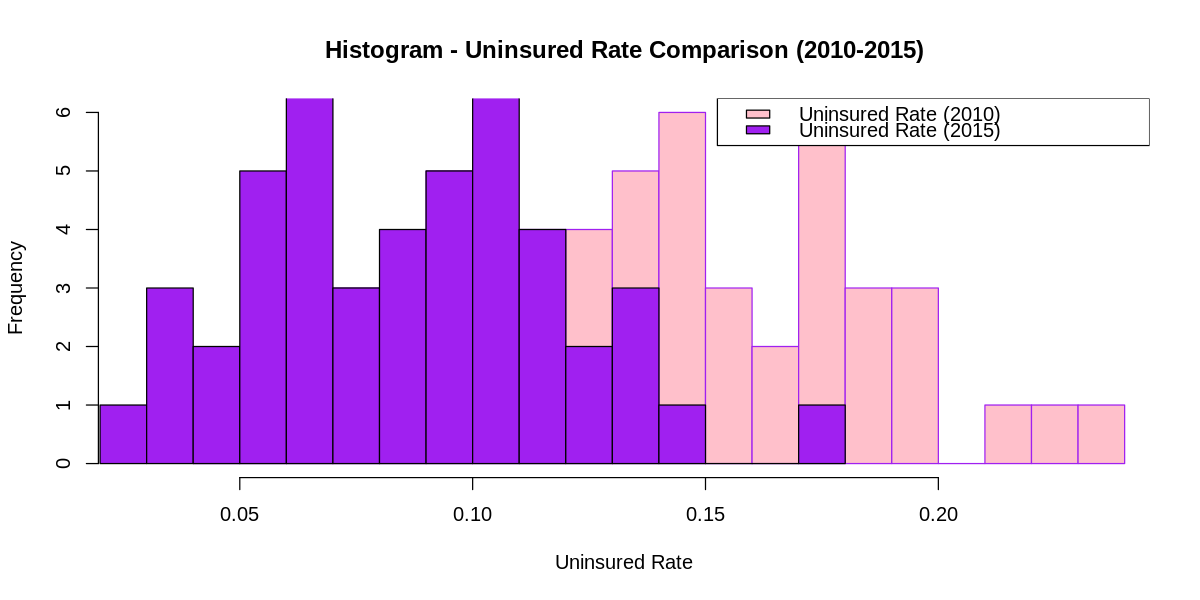

In [65]:
# histogram
hist(uninsured_rate_2010, breaks = 20, col = "pink", border = "purple",
     main = "Histogram - Uninsured Rate Comparison (2010-2015)",
     xlab = "Uninsured Rate",
     ylab = "Frequency",
     xlim = c(min(c(uninsured_rate_2010, uninsured_rate_2015)),
              max(c(uninsured_rate_2010, uninsured_rate_2015))))

# Add the second histogram to the existing plot
hist(uninsured_rate_2015, breaks = 20, col = "purple", border = "black", add = TRUE)

# Add legend
legend("topright", legend = c("Uninsured Rate (2010)", "Uninsured Rate (2015)"),
       fill = c("pink", "purple"))

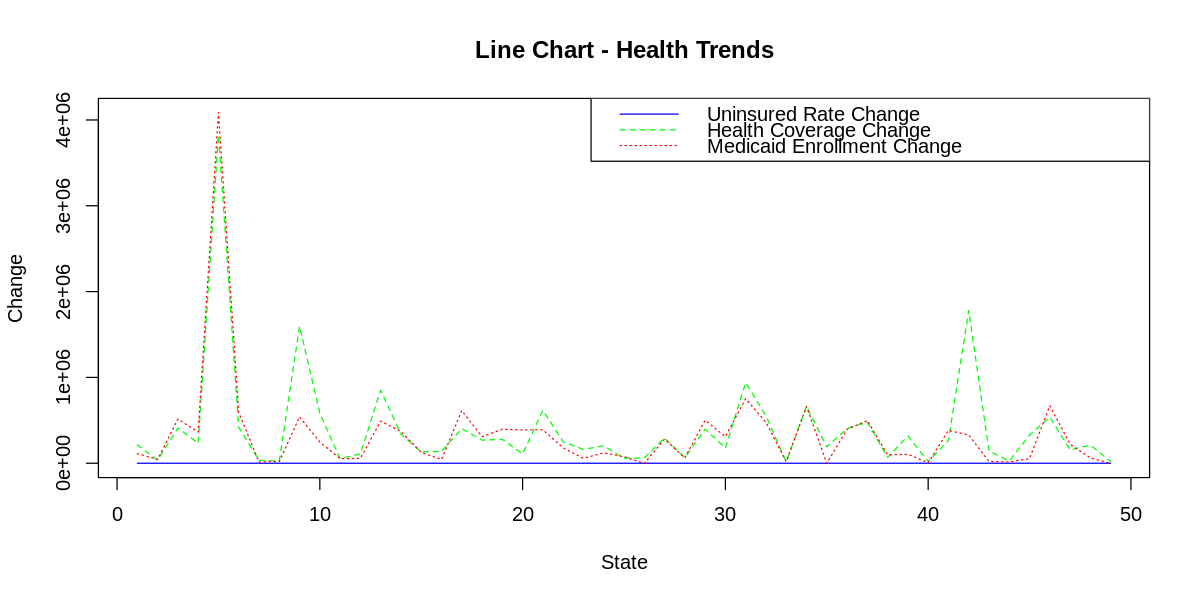

In [66]:
# line chart
plot(uninsured_rate_change, type = "l", col = "blue", lty = 1,
     main = "Line Chart - Health Trends",
     xlab = "State",
     ylab = "Change",
     ylim = c(min(uninsured_rate_change, health_coverage_change, medicaid_enrollment_change),
              max(uninsured_rate_change, health_coverage_change, medicaid_enrollment_change)))

lines(health_coverage_change, col = "green", lty = 2)
lines(medicaid_enrollment_change, col = "red", lty = 3)

# Add legend
legend("topright", legend = c("Uninsured Rate Change", "Health Coverage Change", "Medicaid Enrollment Change"),
       col = c("blue", "green", "red"),
       lty = c(1, 2, 3))
